In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
#We need to check the Null Values in the data and the Data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Distribution of Rating')

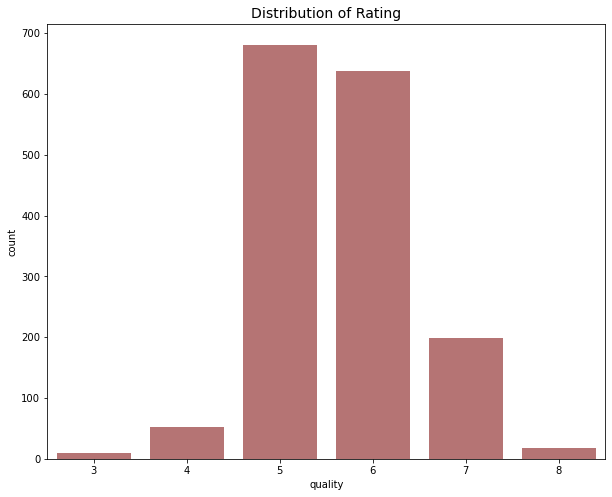

In [6]:
#Checking the distribution of the Ratings
plt.figure(figsize=(10,8))
g = sns.countplot('quality', data=df, color="brown",alpha=.7)
g.set_xticklabels(g.get_xticklabels())
g.set_title("Distribution of Rating",size=14)

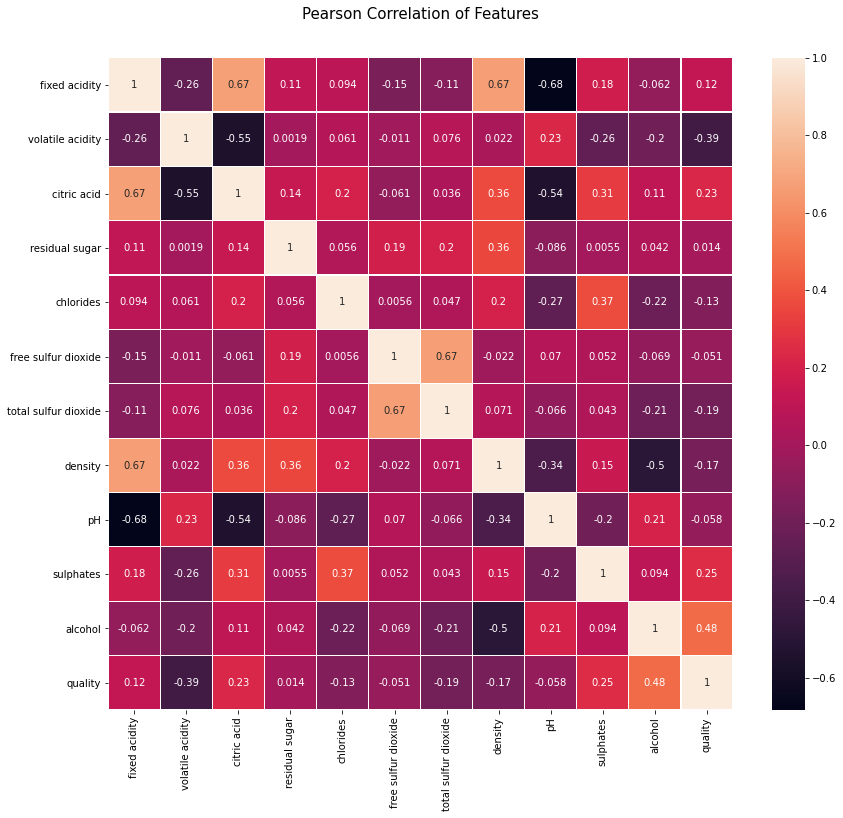

In [7]:

plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
              linecolor='white', annot=True)


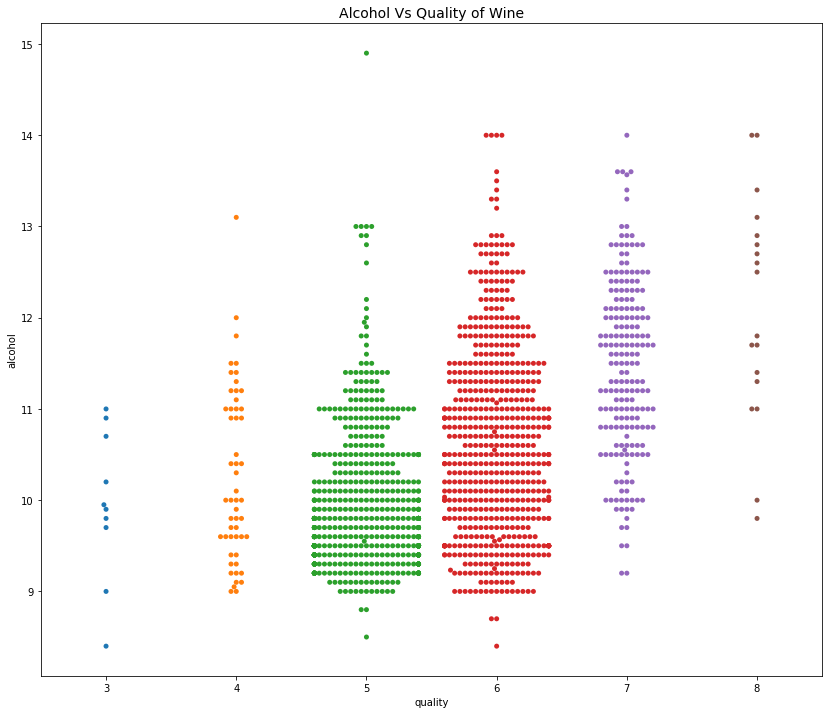

In [8]:
plt.figure(figsize=(14,12))
sns.swarmplot(x="quality",y="alcohol", data=df)
plt.title("Alcohol Vs Quality of Wine",size=14)
plt.show()


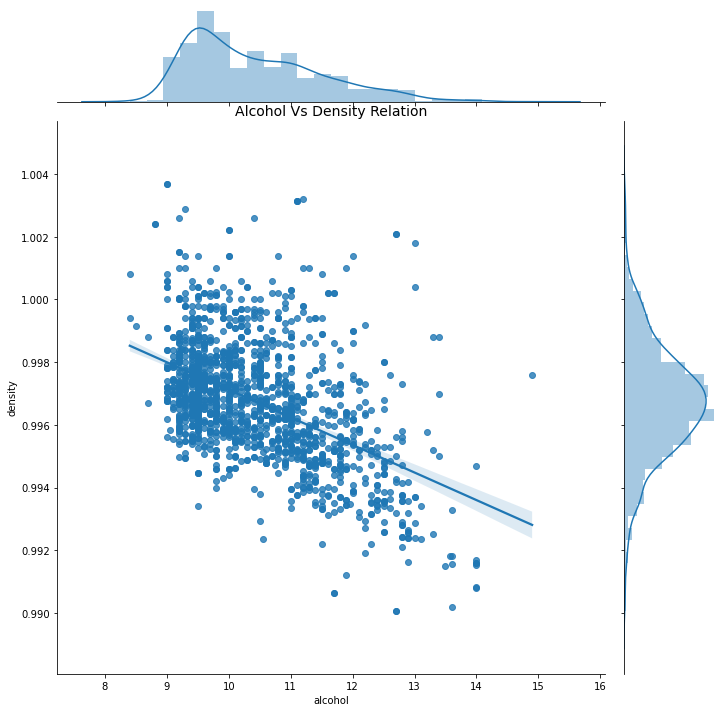

In [9]:
sns.jointplot(x="alcohol",y="density", data=df,kind="reg",height=10)
plt.title("Alcohol Vs Density Relation",size=14)
plt.show()


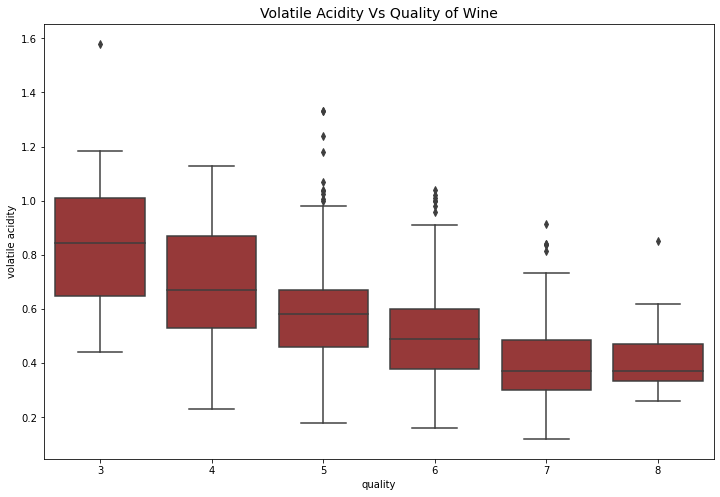

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x="quality",y="volatile acidity", data=df,color="brown")
plt.title("Volatile Acidity Vs Quality of Wine",size=14)
plt.show()

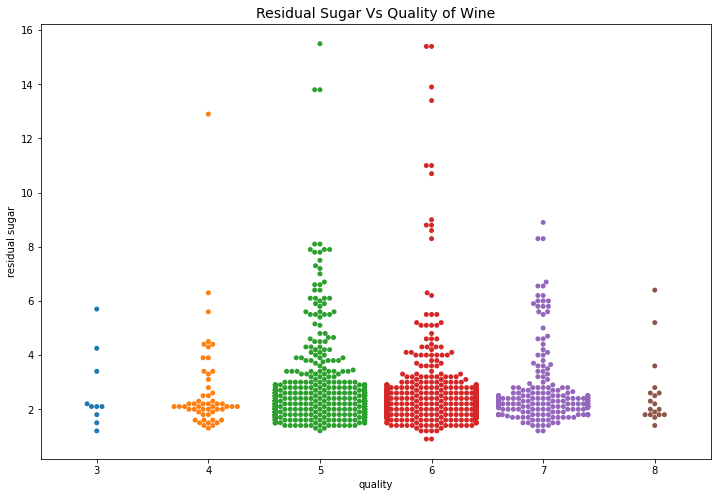

In [11]:
plt.figure(figsize=(12,8))
sns.swarmplot(x="quality",y="residual sugar", data=df)
plt.title("Residual Sugar Vs Quality of Wine",size=14)
plt.show()

# Feature Creation

In [12]:
#Now we will categorize the quality into 2 bins. ie 1 (good) if rating is 6 or more and 0 (not good) if rating less than 6
#Feature Engineering

df["label"] =  df['quality'].apply(lambda x: '1' if x > 5 else '0')


Text(0.5, 1.0, 'Distribution of Labeled Rating')

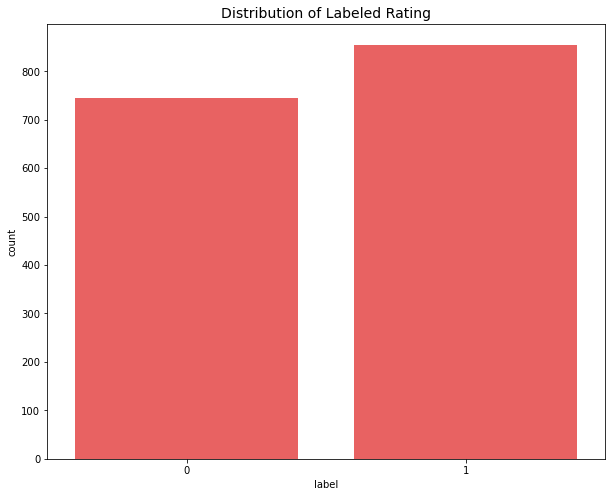

In [13]:
plt.figure(figsize=(10,8))
g = sns.countplot('label', data=df, color="red",alpha=.7)
g.set_xticklabels(g.get_xticklabels())
g.set_title("Distribution of Labeled Rating",size=14)

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [15]:
# now we will split the data into features and labels
features = df.drop(["quality","label"],axis=1)
label = df["label"]

In [16]:
# Now we will scale the features 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = preprocessing.StandardScaler().fit(features).transform(features)


In [17]:
Y = np.asarray(label)


In [19]:
# Now we will split the data into Train (80%) and Test (20%)
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)



Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


# Model Development

RANDOM FOREST MODEL

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [41]:
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [42]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 20.7min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

In [25]:
rf_best = RandomForestClassifier(bootstrap= True,
 max_depth= 100,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split= 12,
 n_estimators= 100)

rf_best.fit(x_train,y_train)


RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=12)

In [34]:
#Evaluation

from sklearn import metrics
from sklearn.metrics import f1_score

y_predict_rf = rf_best.predict(x_test)

rf_acc = metrics.accuracy_score(y_test, y_predict_rf)

rf_f1 = f1_score(y_test, y_predict_rf, average='weighted')
print("rf_acc = ", rf_acc)
print("rf_f1score =",rf_f1)

rf_acc =  0.7875
rf_f1score = 0.7874003283302062


In [41]:
cnf_matrix_rf = confusion_matrix(y_test, y_predict_rf)
cnf_matrix_rf

array([[122,  37],
       [ 31, 130]])

In [42]:
print (classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       159
           1       0.78      0.81      0.79       161

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



XG Boost Model

In [133]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

param_test1 = {
 'max_depth':range(3,30,2),
 'min_child_weight':range(1,15,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=5)

In [134]:
gsearch1.fit(x_train,y_train)
gsearch1.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'max_depth': 9, 'min_child_weight': 3}

In [36]:
xgb_best = XGBClassifier(
 max_depth= 9,
 min_child_weight= 3)

xgb_best.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
y_predict_xgb = xgb_best.predict(x_test)

xgb_acc = metrics.accuracy_score(y_test, y_predict_xgb)

xgb_f1 = f1_score(y_test, y_predict_xgb, average='weighted')
print("XGB_acc = ", xgb_acc)
print("XGB_f1score =",xgb_f1)

XGB_acc =  0.80625
XGB_f1score = 0.8062348609157681


In [149]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_xgb=y_predict_xgb.astype("float64")
confusion_matrix_XGB = confusion_matrix(y_test, y_predict_xgb)
confusion_matrix_XGB

array([[127,  32],
       [ 30, 131]])

In [40]:
print (classification_report(y_test, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       159
           1       0.80      0.81      0.81       161

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



Deep Learning Dense Network

In [74]:
y_train = y_train.astype('float64')
y_train.dtype
y_test = y_test.astype('float64')

In [131]:
import keras
from keras.models import Sequential
from keras.layers import Dense ,Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(11,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])



In [132]:
# fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)
# evaluate the model
scores = model.evaluate(x_test, y_test)
scores

Epoch 1/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6700 - accuracy: 0.6818 - val_loss: 0.6460 - val_accuracy: 0.7063
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.7365 - val_loss: 0.5951 - val_accuracy: 0.7406
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.7404 - val_loss: 0.5672 - val_accuracy: 0.7375
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7514 - val_loss: 0.5502 - val_accuracy: 0.7437
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5271 - accuracy: 0.7553 - val_loss: 0.5475 - val_accuracy: 0.7312
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7600 - val_loss: 0.5427 - val_accuracy: 0.7344
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.7584 - val_loss: 0.5473 - val_accuracy: 0.7250
Epoch 8/100
4

Epoch 59/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.8014 - val_loss: 0.5212 - val_accuracy: 0.7594
Epoch 60/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.8030 - val_loss: 0.5230 - val_accuracy: 0.7563
Epoch 61/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4270 - accuracy: 0.7991 - val_loss: 0.5230 - val_accuracy: 0.7563
Epoch 62/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8014 - val_loss: 0.5224 - val_accuracy: 0.7563
Epoch 63/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8014 - val_loss: 0.5199 - val_accuracy: 0.7594
Epoch 64/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.7998 - val_loss: 0.5219 - val_accuracy: 0.7563
Epoch 65/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4237 - accuracy: 0.8006 - val_loss: 0.5222 - val_accuracy: 0.7563
Epoch 

[0.5220769047737122, 0.768750011920929]

In [150]:
#Now from the 3 Models we can see XGB model performs better than the other models.
#So now we will train the full dataset on XGB model
final_model = XGBClassifier(
 max_depth= 9,
 min_child_weight= 3)

xgb_best.fit(X,Y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(xgb_best, open(filename, 'wb'))